Analisando dados imobiliários

In [27]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.rc('figure', figsize = (14,6))

In [2]:
#lendo arquivo csv para análise
dados = pd.read_csv('aluguel_amostra.csv', sep=';')

In [3]:
#exibindo 10 primeiros itens do dataset
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Apartamento,Recreio dos Bandeirantes,3,2,1,320,3200.0,1319.0,0.0,10.00,Apartamento
1,Apartamento,Maracanã,2,0,0,59,800.0,725.0,47.0,13.56,Apartamento
2,Apartamento,Leblon,3,2,1,147,7500.0,1000.0,381.0,51.02,Apartamento
3,Apartamento,São Conrado,3,3,3,270,14999.0,2800.0,1200.0,55.55,Apartamento
4,Apartamento,Tijuca,2,1,0,65,1200.0,640.0,97.0,18.46,Apartamento
5,Apartamento,Cachambi,2,1,1,75,1400.0,715.0,0.0,18.67,Apartamento
6,Apartamento,Glória,1,0,0,52,1700.0,560.0,0.0,32.69,Apartamento
7,Apartamento,Engenho Novo,2,1,0,70,1200.0,430.0,21.0,17.14,Apartamento
8,Apartamento,Maracanã,1,1,0,59,1500.0,410.0,0.0,25.42,Apartamento
9,Apartamento,Flamengo,3,0,0,100,2500.0,980.0,105.0,25.00,Apartamento


<Axes: >

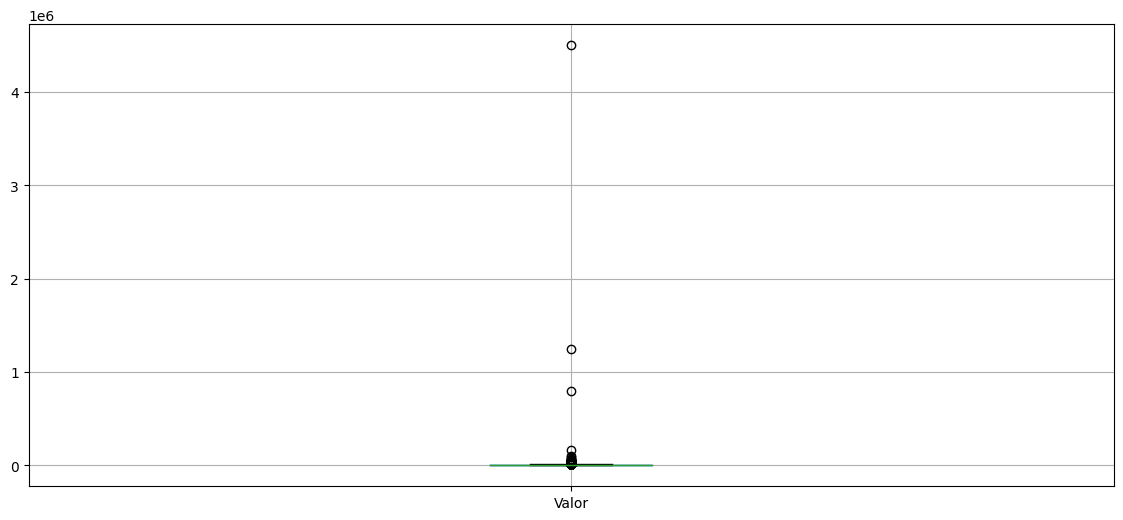

In [4]:
#criando boxplot com o índice valor
dados.boxplot(['Valor'])


In [5]:
#exibindo outliers
dados[dados['Valor'] >= 500000]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
535,Apartamento,Recreio dos Bandeirantes,3,2,1,167,1250000.0,1186.0,320.0,7485.03,Apartamento
726,Casa de Condomínio,Freguesia (Jacarepaguá),4,2,3,163,800000.0,900.0,0.0,4907.98,Casa
7493,Apartamento,Botafogo,4,1,1,300,4500000.0,1100.0,0.0,15000.00,Apartamento


In [6]:
# separando boxplot em quartis com limite inferior e superior visando a remoção de outliers para uma análise mais concisa
valor_m2 = dados['Valor m2']
Q1 = valor_m2.quantile(.25)
Q3 = valor_m2.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ
Q1,Q3,IIQ, limite_inferior, limite_superior

(21.25, 42.31, 21.060000000000002, -10.340000000000003, 73.9)

In [7]:
#filtrando dados da seleção sem outliers
selecao = (valor_m2 >=limite_inferior) & (valor_m2 <= limite_superior)
dados_new = dados[selecao]

array([[<Axes: title={'center': 'Valor m2'}>]], dtype=object)

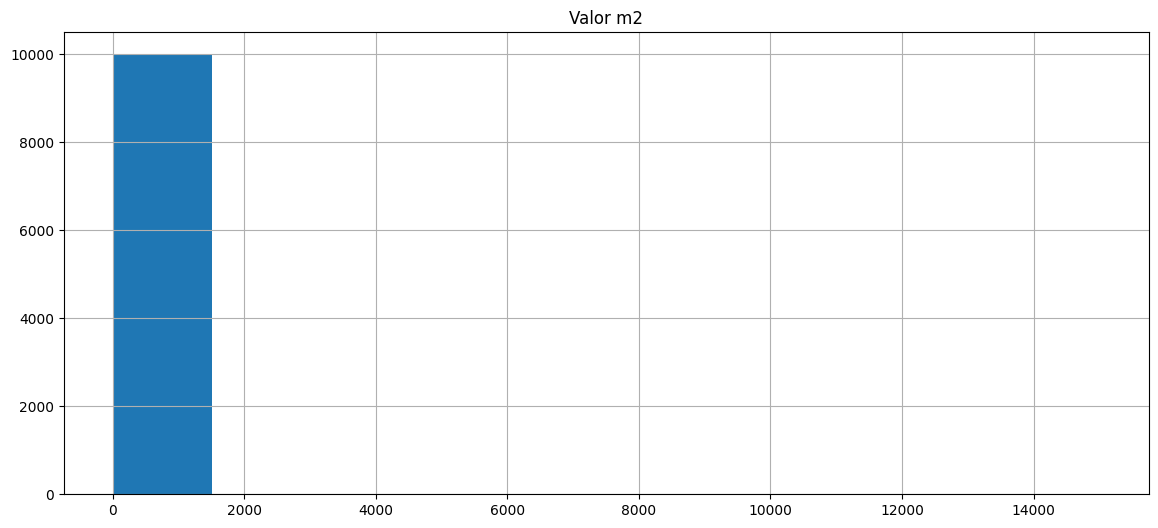

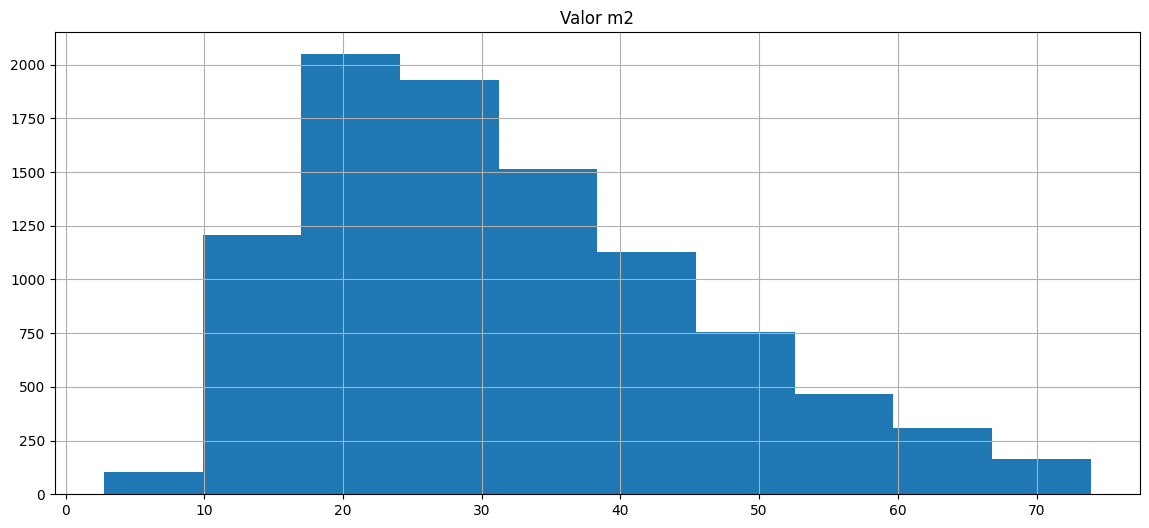

In [8]:
#criando histograma com os índices de valor m2
dados.hist(['Valor m2'])
dados_new.hist(['Valor m2'])

<Axes: title={'center': 'Valor'}, xlabel='[Tipo]'>

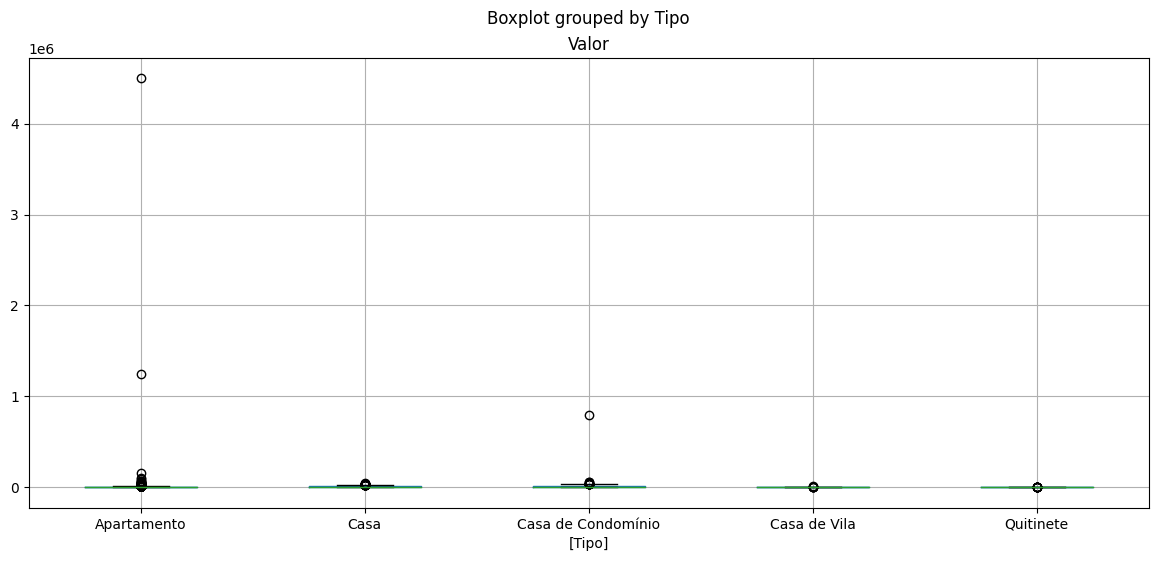

In [9]:
# criando boxplot com valores separados por tipo de propriedade
dados.boxplot(['Valor'], by = ['Tipo'])

In [10]:
#agrupando diferentes tipos em diferentes grupos de valores
grupo_tipo = dados.groupby('Tipo')
grupo_tipo = dados.groupby('Tipo')['Valor']

In [11]:
#separando grupos pela "área de custo" que se localizam dentro do gráfico
Q1 =  grupo_tipo.quantile(.25) 
Q3 =  grupo_tipo.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [12]:
#limite superior para o tipo apartamento 
limite_superior['Apartamento']

9950.0

In [13]:
#tipos de propriedades disponíveis
for tipo in grupo_tipo.groups.keys():
    print(tipo)

Apartamento
Casa
Casa de Condomínio
Casa de Vila
Quitinete


In [14]:
#removendo outliers fazendo a seleção de propriedades dentro dos limites estipulados
for tipo in grupo_tipo.groups.keys():
    eh_tipo = dados['Tipo'] == tipo
    eh_dentro_limite = (dados['Valor'] >= limite_inferior[tipo]) & (dados['Valor'] <= limite_superior[tipo])
    selecao = eh_tipo & eh_dentro_limite
    dados[selecao]

In [15]:
#criando novo dataframe com a seleção de imóveis dentro dos limites
dados_new = pd.DataFrame()
for tipo in grupo_tipo.groups.keys():
    eh_tipo = dados['Tipo'] == tipo
    eh_dentro_limite = (dados['Valor'] >= limite_inferior[tipo]) & (dados['Valor'] <= limite_superior[tipo])
    selecao = eh_tipo & eh_dentro_limite
    dados_selecao = dados[selecao]
    dados_new = pd.concat([dados_new, dados_selecao])

<Axes: title={'center': 'Valor'}, xlabel='[Tipo]'>

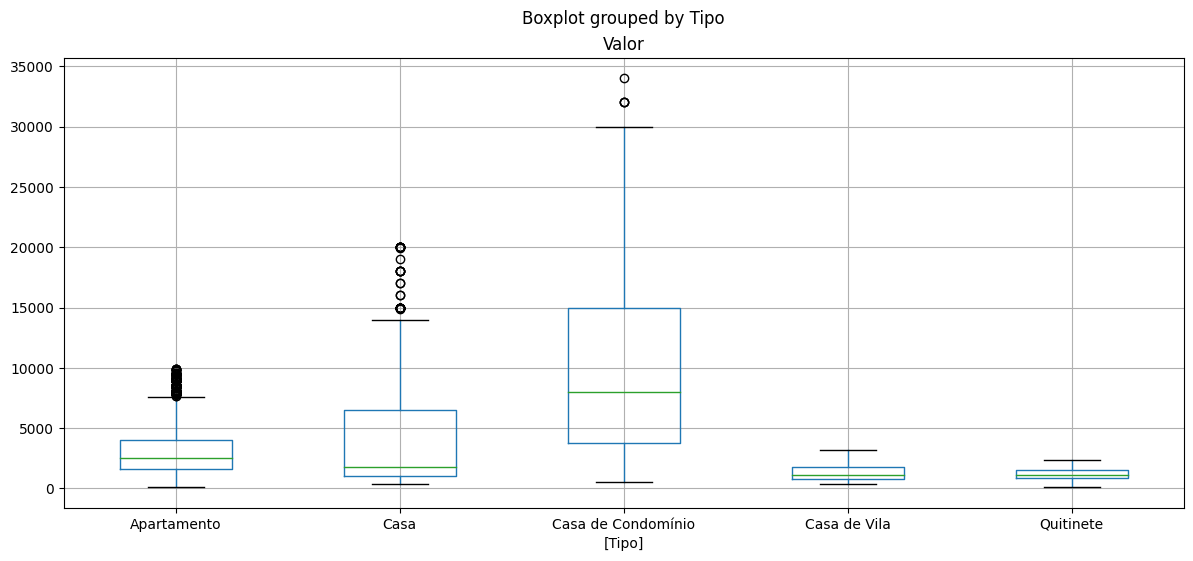

In [16]:
#novo boxplot, agora apenas com a nova seleção de dados
dados_new.boxplot(['Valor'], by = ['Tipo'])

In [17]:
# Salvando o dataframe de dados de aluguel em csv sem os outliers para análises futuras
dados_new.to_csv('aluguel_residencial_sem_outliers.csv', sep = ';', index = False)

In [18]:
#configurando figsize
plt.rc('figure', figsize = (15,8))

In [19]:
#criando figura
area = plt.figure() 

<Figure size 1500x800 with 0 Axes>

In [20]:
#criando subplots para mostrar todos os gráficos em uma mesma figura
g1 = area.add_subplot(2, 2, 1)
g2 = area.add_subplot(2, 2, 2)
g3 = area.add_subplot(2, 2, 3)
g4 = area.add_subplot(2, 2, 4)

In [21]:
#Criando gráficos de dispersão com as variáveis valor e área
g1.scatter(dados.Valor, dados.Area)
g1.set_title('Valor X Área')

Text(0.5, 1.0, 'Valor X Área')

In [22]:
#configurando os gráficos
g1.scatter(dados.Valor, dados.Area)
g1.set_title('Valor X Área')

g2.hist(dados.Valor)
g2.set_title('Histograma')

dados_g3 = dados.Valor.sample(100) #amostra aleatória dentro do dataframe 
dados_g3.index = range(dados_g3.shape[0]) #reordenando o index
g3.plot(dados_g3)
g3.set_title('Amostra (Valor)')

grupo = dados.groupby('Tipo')['Valor']
label = grupo.mean().index
valores = grupo.mean().values
g4.bar(label, valores)
g4.set_title('Valor Médio por Tipo')

Text(0.5, 1.0, 'Valor Médio por Tipo')

In [23]:
#salvando os gráficos em arquivo png
area.savefig('grafico.png', dpi = 300, bbox_inches = 'tight')

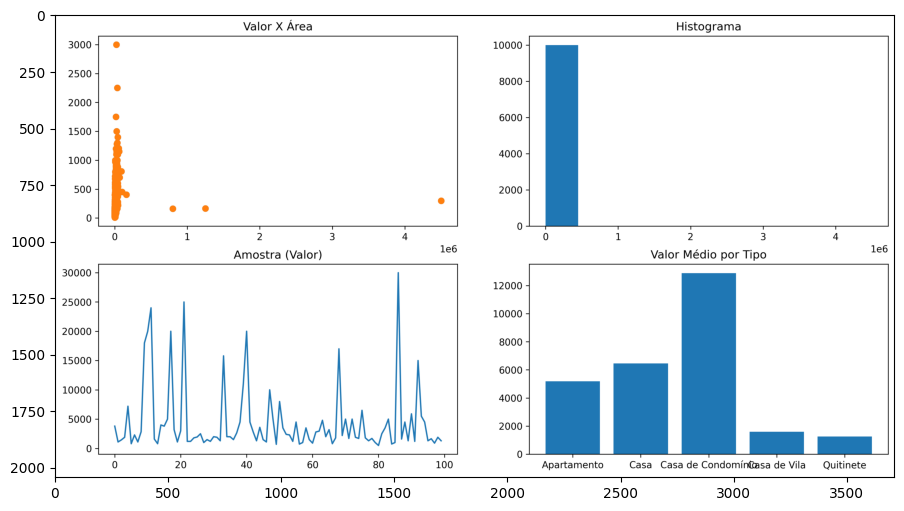

In [28]:
#plotando gráficos gerados
img = mpimg.imread('grafico.png')
imgplot = plt.imshow(img)
plt.show()